## Matplotlib: Visualizing Data with Python. 

Matplotlib is a *module*, just like the `pandas` module that we learned about in the previous lesson. It contains many useful functions for turning data (perhaps stored in a pandas dataframe) into beautiful graphs. Let's take a look at how this module works. First, we'll need to import it: 

In [1]:
# the line below is a magic jupyter command to make our graphs show up right - you can ignore it
%matplotlib inline
# this is the line that actually imports our module
import matplotlib.pyplot as plt

Looking at the above line, let's just quickly refresh our memory on how importing modules works:

1. The `import` keyword indicates that we wish to import the features of a module for use in our program
2. The module name `matplotlib.pyplot` indicates the specific module whose features we wish to use
3. The `as` keyword indicates that we wish to give the module a shorthand alias within our program
4. The alias name that we wish to give this module is `plt`

Now that we've imported matplotlib, let's look at what this module can do.

### Scatter Plots

The `matplotlib` module provides many functions that can be used to visualize data. For example, we can look at a scatter plot of the height of various people versus their weight:

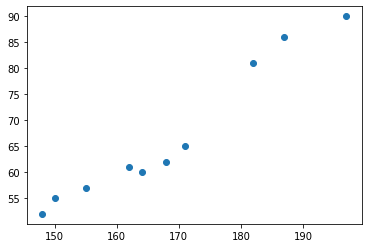

In [2]:
heights_in_cm = [182, 150, 197, 164, 171, 155, 187, 148, 162, 168]
weights_in_kg = [81, 55, 90, 60, 65, 57, 86, 52, 61, 62]
plt.scatter(heights_in_cm, weights_in_kg)
plt.show()

Notice that the lines of code above work as follows:

1. We call the `scatter` function and provide it with two arguments: a list of $x$ values, and a list of $y$ values
2. We call the `show` function to make our graph show up on the screen

Matplotlib gives us various ways to control the appearance of our graphs in order to make them more beautiful. For example, we can change the color of our scatter markers as follows:

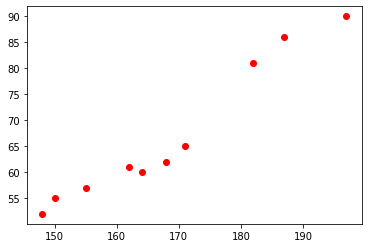

In [3]:
plt.scatter(heights_in_cm, weights_in_kg, c="r")
plt.show()

Notice that we have used the **keyword argument** `c="r"` to specify the color of our points. Matplotlib provides a variety of keyword arguments that you can use to control the appearance of your graphs. For example, suppose that we wish to also change the shape of the scatter markers. We can do so with the code below:

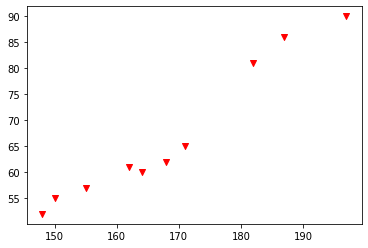

In [4]:
plt.scatter(heights_in_cm, weights_in_kg, c="r",marker="v")
plt.show()

Remember, using keyword arguments allow you to harmlessly reverse the order of arguments, making it harder to make crucial mistakes. For example, the following lines work just fine even though we have reversed the order of the keyword arguments:

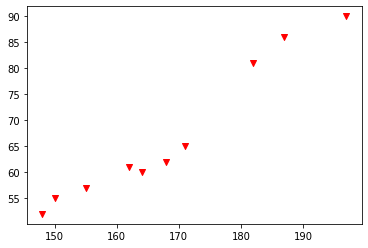

In [5]:
plt.scatter(heights_in_cm, weights_in_kg, marker="v", c="r")
plt.show()

You can consult the matplotlib documentation regarding [colors](https://matplotlib.org/api/colors_api.html) and [markers](https://matplotlib.org/api/markers_api.html) to see the full range of color and marker options that are available to you. 

Let's learn a few more functions that will make our graphs higher quality. 
We can use the functions below to add labels to the axes and a title to the graph:

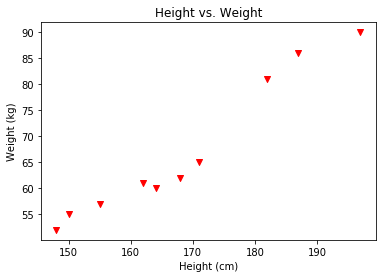

In [6]:
plt.title("Height vs. Weight")
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.scatter(heights_in_cm, weights_in_kg, marker="v", c="r")
plt.show()

<span style="color:blue;font-weight:bold">Exercise</span>:  Using the following data, make a scatter plot of `age_yrs` (*x*) vs `annual_income_usd` (*y*). Use the `marker` keyword argument to specify the `pentagon` marker (look it up in the matplotlib documentation) and use the `c` keyword argument to make the color green. Give your graph a title and label the axes.

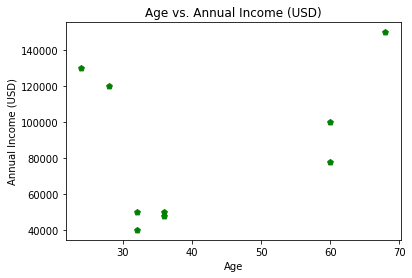

In [17]:
annual_income_usd = [100000, 130000, 40000, 50000, 120000, 48000, 50000,78000, 150000]
age_yrs = [60, 24, 32, 36, 28, 36, 32, 60, 68]

plt.scatter(age_yrs, annual_income_usd, marker="p", c="g")
plt.title("Age vs. Annual Income (USD)")
plt.xlabel("Age")
plt.ylabel("Annual Income (USD)")
plt.show()

In [17]:
@mock.patch.multiple(
    'matplotlib.pyplot',
    scatter=mock.DEFAULT,
    xlabel=mock.DEFAULT,
    ylabel=mock.DEFAULT,
    title=mock.DEFAULT,
    show=mock.DEFAULT
)
def check_graph_income(
    scatter, 
    xlabel,
    ylabel,
    title,
    show
):
    exec(In[-1])
    # check scatter
    try:
        scatter.assert_called_with(age_yrs, annual_income_usd,  c="g", marker="p")
    except AssertionError:
        raise ExerciseError("Did you call <code>plt.scatter</code> with the correct arguments?")
    
    # check titles
    try:
        xlabel.assert_called()
        ylabel.assert_called()
        title.assert_called()
    except AssertionError:
        raise ExerciseError("Did you give your graph a title and label both axes?")
    
    # check show
    try:
        show.assert_called()
    except AssertionError:
        raise ExerciseError("Did you remember to call <code>plt.show</code> at the end?")
check_graph_income()
success()

## Plotting Data from `pandas`

Our *x* and *y* variables do not always need to be represented by Python lists - we can also obtain them from the pandas dataframes that we worked with in the previous lesson. For example, let's load some data from a CSV file using pandas:

In [18]:
import pandas as pd
df = pd.read_csv("data/ice-cream-sales.csv")
df.head()

,DailyHighTemperatureC,DailySalesContainers
0,21,19
1,22,10
2,23,24
3,24,57
4,26,49


We can create a scatter plot of this data as follows:

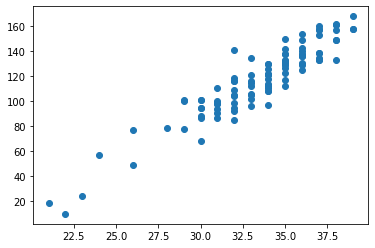

In [19]:
plt.scatter(df['DailyHighTemperatureC'], df['DailySalesContainers'])
plt.show()

This scatter plot shows us that we sell more ice cream on hotter days, as expected. 

<span style="color:blue;font-weight:bold">Exercise</span>: Perform the following actions:

1. Load the data in the CSV file `data/employee-churn.csv` and store the result in the variable `churn_df` using the function `pd.read_csv`
2. Use `plt.scatter` to graph the dataframe column `gpa` on the *x* axis and `aptitude.score` on the *y* axis. Use the `star` marker (`"*"`)
3. Call `plt.show` to finalize your graph.

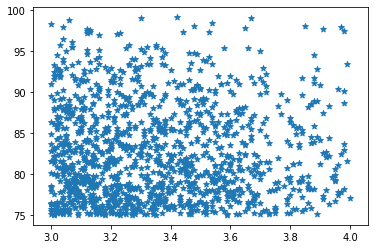

In [24]:
churn_df = pd.read_csv("data/employee-churn.csv")
plt.scatter(churn_df.gpa, churn_df["aptitude.score"], marker="*")
plt.show()

In [24]:
df_hint = "Did you load <code>churn_df</code> correctly using <code>read_csv</code>?"
correct_churn_df = pd.read_csv("data/employee-churn.csv")
assert isinstance(churn_df, pd.DataFrame), df_hint
assert churn_df.equals(correct_churn_df), df_hint

@mock.patch.multiple(
    'matplotlib.pyplot',
    scatter=mock.DEFAULT,
    show=mock.DEFAULT
)
def check_graph_churn(
    scatter, 
    show
):
    exec(In[-1])
    
    # check scatter
    scatter_hint = "Did you call <code>plt.scatter</code> with the correct arguments?"
    positional_args, keyword_args = scatter.call_args
    assert isinstance(positional_args[0], pd.Series), scatter_hint
    assert isinstance(positional_args[1], pd.Series), scatter_hint
    assert positional_args[0].equals(churn_df['gpa']), scatter_hint
    assert positional_args[1].equals(churn_df['aptitude.score']), scatter_hint
    assert positional_args[1].equals(churn_df['aptitude.score']), scatter_hint
    assert keyword_args["marker"] == "*", scatter_hint
    # check show
    try:
        show.assert_called()
    except AssertionError:
        raise ExerciseError("Did you remember to call <code>plt.show</code> at the end?")
check_graph_churn()
success()

Pandas also provides a convenient shortcut method for making plots like the above - we can simply use the `plot.scatter` method of our data frame and specify the appropriate column names:

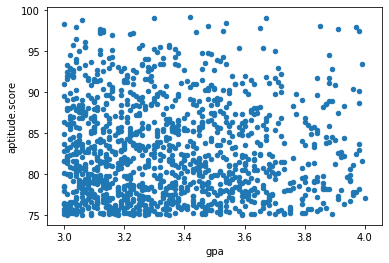

In [25]:
churn_df.plot.scatter(
    'gpa',
    'aptitude.score'
)
plt.show()

### Line Plots

In addition to scatter plots, another basic type of graph that matplotlib can make is a line plot. We simply need to use the `plot` function rather than the `scatter` function:

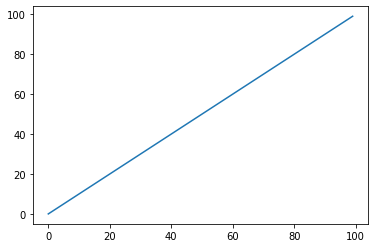

In [26]:
x = range(0,100)
y = range(0,100)
plt.plot(x, y)
plt.show()

Note that if our data contains "kinks", or deviations from linearity, matplotlib will produce a jagged line:

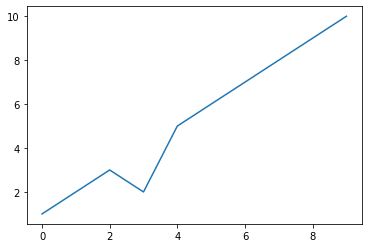

In [27]:
x = range(0,10)
y = [1,2,3,2,5,6,7,8,9,10]
plt.plot(x, y)
plt.show()

Also note from the cell above that we can "mix and match" pandas objects and normal Python lists - all that matters is that our arguments are "array like."

There is much, much more that matplotlib can do than draw the simple plots which we have reviewed so far. Take a tour of the matplotlib [gallery](https://matplotlib.org/gallery.html) to get an idea of the range of capabilities of this powerful tool.